### 4. Medical history (mh.csv) - [One record per medical history event per subject]

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize
#import nltk

In [200]:
# Load medical history .csv file
possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'mh.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))
# create data frame
medical_history = pd.read_csv(file_path)

# Sort by the 'USUBJID' and 'MHSEQ' columns in ascending order
medical_history = medical_history.sort_values(by=['USUBJID','MHSEQ'], ascending=True)
medical_history #check warning!!!

C:\Users\anaso\AppData\Local\Temp\ipykernel_3708\531237273.py:10: DtypeWarning: Columns (9,23,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  medical_history = pd.read_csv(file_path)


,STUDYID,DOMAIN,USUBJID,MHSEQ,MHGRPID,MHREFID,MHSPID,MHTERM,MHMODIFY,MHLLT,...,MHDY,MHSTDY,MHENDY,MHDUR,MHSTRF,MHENRF,MHEVLINT,MHENRTPT,MHENTPT,MHHLGT
21041,MSOAC,MH,MSOAC/0014,1,NaN,NaN,NaN,RRMS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12262,MSOAC,MH,MSOAC/0016,1,NaN,NaN,NaN,BOWEL URGENCY OR INCONTINENCE,NaN,NaN,...,-21.0,NaN,NaN,NaN,NaN,NaN,-P3M,NaN,NaN,NaN
12296,MSOAC,MH,MSOAC/0016,2,NaN,NaN,NaN,CEREBELLAR SYMPTOMS,NaN,NaN,...,-21.0,NaN,NaN,NaN,NaN,NaN,-P3M,NaN,NaN,NaN
12302,MSOAC,MH,MSOAC/0016,3,NaN,NaN,NaN,CONSTIPATION,NaN,NaN,...,-21.0,NaN,NaN,NaN,NaN,NaN,-P3M,NaN,NaN,NaN
12323,MSOAC,MH,MSOAC/0016,4,NaN,NaN,NaN,DECREASED MENTATION,NaN,NaN,...,-21.0,NaN,NaN,NaN,NaN,NaN,-P3M,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15955,MSOAC,MH,MSOAC/9998,36,NaN,NaN,NaN,URINARY URGENCY,NaN,NaN,...,-28.0,-294.0,NaN,NaN,NaN,NaN,NaN,ONGOING,SCREENING -3,NaN
15372,MSOAC,MH,MSOAC/9998,37,NaN,NaN,NaN,VERTIGO,NaN,NaN,...,-28.0,NaN,NaN,NaN,NaN,NaN,NaN,ONGOING,SCREENING -3,NaN
20393,MSOAC,MH,MSOAC/9998,38,NaN,NaN,NaN,MS DIAGNOSIS,NaN,NaN,...,-28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20438,MSOAC,MH,MSOAC/9998,39,NaN,NaN,NaN,PPMS,NaN,NaN,...,-28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of patients

In [201]:
unique_count = medical_history['USUBJID'].nunique()
print(f"Number of (unique) patients in this dataset: {unique_count}")

Number of (unique) patients in this dataset: 2465


Check how many missing values we have per column

In [202]:
missing_percentage_mh = (medical_history.isnull().sum() / len(medical_history)) * 100
missing_medical_history = pd.DataFrame({'Column Name': missing_percentage_mh.index, 'Missing Percentage': missing_percentage_mh.values})
#missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
missing_medical_history = missing_medical_history.sort_values(by='Missing Percentage', ascending=False)
print(missing_medical_history)

   Column Name  Missing Percentage
19       MHLOC          100.000000
26       MHDTC          100.000000
16    MHREASND          100.000000
33      MHSTRF          100.000000
4      MHGRPID          100.000000
5      MHREFID          100.000000
6       MHSPID          100.000000
32       MHDUR          100.000000
8     MHMODIFY          100.000000
20       MHLAT          100.000000
15      MHSTAT          100.000000
28     MHENDTC          100.000000
27     MHSTDTC          100.000000
31      MHENDY           99.535274
22      MHPATT           99.169587
23    MHCONTRT           94.853725
35    MHEVLINT           93.802377
30      MHSTDY           88.861801
38      MHHLGT           87.608563
9        MHLLT           87.608563
18       MHSOC           84.153588
21       MHSEV           81.932805
37     MHENTPT           80.367210
36    MHENRTPT           80.367210
14     MHOCCUR           76.980801
13     MHPRESP           76.980801
12      MHSCAT           69.644218
34      MHENRF      

Drop columns with more than 80% missing and others, namely:
- **STUDYID**
- **DOMAIN**
- **MHGRPID, MHREFID, MHSPID, MHMODIFY, MHSTAT, MHREASND, MHLOC, MHLAT, MHDTC, MHSTDTC, MHENDTC, MHDUR, MHSTRF**: (all values missing and not even mentioned in the dictionary)
- **MHENTPT**: End Reference Time Point (either NA or SCREENING -3)


Columns being dropped, but maybe we should keep:
- **MHLLT**: Lowest Level Term (87.6% missing)
- **MHPATT**: Pattern of Event (more than 99% missing)
- **MHSTDY**: Study Day of Start of Observation (around 88% missing - and is the start that is missing)
- **MHENDY**: Study Day of End of Observation (more than 99% missing)
- **MHENRTPT**: End Relative to Reference Time Point (either NA or ONGOING + 80% missing)
- **MHHLGT**: High Level Group Term (87.6% missing)
- **MHEVLINT**: Evaluation Interval (around 93% missing)

In [203]:
columns_to_drop = missing_medical_history[missing_medical_history['Missing Percentage'] > 95]['Column Name'].tolist()
additional_columns_to_drop = ['STUDYID', 'DOMAIN', 'MHENTPT','MHLLT','MHSTDY','MHENRTPT','MHHLGT','MHEVLINT'] 
columns_to_drop.extend(additional_columns_to_drop)
medical_history.drop(columns=columns_to_drop, inplace=True)
medical_history

,USUBJID,MHSEQ,MHTERM,MHDECOD,MHCAT,MHSCAT,MHPRESP,MHOCCUR,MHBODSYS,MHSOC,MHSEV,MHCONTRT,VISITNUM,VISIT,MHDY,MHENRF
21041,MSOAC/0014,1,RRMS,Relapsing-remitting multiple sclerosis,PRIMARY DIAGNOSIS,PROTOCOL DEFINED CURRENT COURSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12262,MSOAC/0016,1,BOWEL URGENCY OR INCONTINENCE,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN
12296,MSOAC/0016,2,CEREBELLAR SYMPTOMS,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN
12302,MSOAC/0016,3,CONSTIPATION,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN
12323,MSOAC/0016,4,DECREASED MENTATION,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15955,MSOAC/9998,36,URINARY URGENCY,NaN,MS SYMPTOMS PRIOR TO STUDY,NaN,NaN,NaN,NaN,NaN,MILD,NaN,-3.0,SCREENING -3,-28.0,NaN
15372,MSOAC/9998,37,VERTIGO,NaN,MS SYMPTOMS PRIOR TO STUDY,NaN,NaN,NaN,NaN,NaN,MILD,NaN,-3.0,SCREENING -3,-28.0,NaN
20393,MSOAC/9998,38,MS DIAGNOSIS,Multiple sclerosis,PRIMARY DIAGNOSIS,ONSET COURSE,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,SCREENING -3,-28.0,NaN
20438,MSOAC/9998,39,PPMS,Primary progressive multiple sclerosis,PRIMARY DIAGNOSIS,PROTOCOL DEFINED CURRENT COURSE,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,SCREENING -3,-28.0,NaN


In [204]:
# MHTERM
mhterm_counts_medical_history = medical_history['MHTERM'].value_counts().reset_index()
mhterm_counts_medical_history.columns = ['MHTERM', 'Count']
total_count = mhterm_counts_medical_history['Count'].sum()
mhterm_counts_medical_history['Percentage'] = (mhterm_counts_medical_history['Count'] / total_count) * 100
print(mhterm_counts_medical_history) #too many

                                        MHTERM  Count  Percentage
0                                         RRMS   1564    5.957641
1                                      FATIGUE    635    2.418863
2                                         SPMS    522    1.988420
3                                           MS    510    1.942709
4              DIAGNOSIS OF MULTIPLE SCLEROSIS    508    1.935091
...                                        ...    ...         ...
7440         ENDOMETRIAL ABLATION - [REDACTED]      1    0.003809
7441                     IRON DEFICIENT ANEMIA      1    0.003809
7442  OSTEOARTHRITIS-KNEES, FINGERS (NOT R.A.)      1    0.003809
7443            PARS PLANITIS RIGHT EYE-AGE 13      1    0.003809
7444                       RECURRENT SINUSITIS      1    0.003809

[7445 rows x 3 columns]


In [205]:
import Levenshtein

# Function to calculate Levenshtein distance
def levenshtein_distance(str1, str2):
    return Levenshtein.distance(str1, str2)

# Function to group CETERM values based on edit distance
def group_by_edit_distance(df, column, threshold):
    grouped_categories = {}

    def group_category(category):
        for group_name, group_members in grouped_categories.items():
            for member in group_members:
                if levenshtein_distance(category, member) <= threshold:
                    return group_name
        return category

    original_categories = df[column].tolist()

    for index, row in df.iterrows():
        category = row[column]
        group_name = group_category(category)
        
        if group_name not in grouped_categories:
            grouped_categories[group_name] = {category}
        else:
            grouped_categories[group_name].add(category)

    return original_categories, grouped_categories

# Function to print original and grouped categories
def print_original_and_grouped(original_categories, grouped_categories):
    print("Original Categories:")
    print(original_categories)

    print("\nGrouped Categories:")
    num_groups = 0
    for group_name, distinct_values in grouped_categories.items():
        num_groups += 1
        print(f"Group: {group_name}, Number of Distinct Values: {len(distinct_values)}") #, Distinct Values: {distinct_values}

    print("\nNumber of Groups Created:", num_groups)

threshold = 15
original_categories, grouped_categories = group_by_edit_distance(medical_history, 'MHTERM', threshold)
print_original_and_grouped(original_categories, grouped_categories)

Original Categories:
['RRMS', 'BOWEL URGENCY OR INCONTINENCE', 'CEREBELLAR SYMPTOMS', 'CONSTIPATION', 'DECREASED MENTATION', 'DIFFICULTY SWALLOWING', 'DOUBLE VISION', 'ELEVATED CHOLESTEROL', 'EMOTIONAL LABILITY OR DEPRESSION', 'FACIAL WEAKNESS', 'FATIGUE', 'FINE RASH MID STERNUM X30 YEARS', 'HEART MURMUR, NOT CLINICALLY SIGNIFICANT', 'HEAT INTOLERANCE', 'IMBALANCE', 'LIMB WEAKNESS', 'LOSS OF SENSATION', 'LOSS OF VISION', 'MUSCLE TIGHTNESS', 'OCCASIONAL INSOMNIA', 'PAIN', 'PARESTHESIAS', 'SECONDARY-PROGRESSIVE', 'SEXUAL DYSFUNCTION', 'SLURRED SPEECH', 'SPASTICITY', 'TREMOR', 'URINARY CONTROL PROBLEMS', 'VERTIGO', 'VARICES', 'GAIT ATAXIA', 'HYPERREFLEXIA', 'LIMB WEAKNESS', 'MUSCLE SPASMS', 'PAIN', 'PARESTHESIA', 'SENSORY IMPAIRMENT', 'SEXUAL DYSFUNCTION', 'URINARY HESITANCY', 'MS DIAGNOSIS', 'PPMS', 'MS', 'HORSE SERUM', 'CHEST PAIN [REDACTED]', 'DIVERTICULUM BLADDER', 'RESECTION OF DIVERTICULI [REDACTED]', 'CONTACT DERMATITIS', "RECURRENT UTI'S", 'BILATERAL HIP REPLACEMENT FOR OSTEOARTHR

In [206]:
# MHDECOD
mhdecod_counts_medical_history = medical_history['MHDECOD'].value_counts().reset_index()
mhdecod_counts_medical_history.columns = ['MHDECOD', 'Count']
total_count = mhdecod_counts_medical_history['Count'].sum()
mhdecod_counts_medical_history['Percentage'] = (mhdecod_counts_medical_history['Count'] / total_count) * 100
print(mhdecod_counts_medical_history) #stil too many

                                       MHDECOD  Count  Percentage
0       Relapsing-remitting multiple sclerosis   1580   10.056648
1              DIAGNOSIS OF MULTIPLE SCLEROSIS   1008    6.415887
2                           Multiple sclerosis    912    5.804850
3     Secondary progressive multiple sclerosis    857    5.454777
4                           MULTIPLE SCLEROSIS    514    3.271593
...                                        ...    ...         ...
1372                                  DEMENTIA      1    0.006365
1373                         IRIDOCYCLITIS NOS      1    0.006365
1374                    FX CLAVICLE NOS-CLOSED      1    0.006365
1375                      FX FIBULA NOS-CLOSED      1    0.006365
1376                     ENDOCRINE ANOMALY NEC      1    0.006365

[1377 rows x 3 columns]


In [207]:
# MHCAT
mhcat_counts_medical_history = medical_history['MHCAT'].value_counts().reset_index()
mhcat_counts_medical_history.columns = ['MHCAT', 'Count']
total_count = mhcat_counts_medical_history['Count'].sum()
mhcat_counts_medical_history['Percentage'] = (mhcat_counts_medical_history['Count'] / total_count) * 100
print(mhcat_counts_medical_history) #stil quite some categories, but better

                              MHCAT  Count  Percentage
0             MS SIGNS AND SYMPTOMS   4940   21.479195
1        MS SYMPTOMS PRIOR TO STUDY   4078   17.731206
2                 PRIMARY DIAGNOSIS   2704   11.757033
3           GENERAL MEDICAL HISTORY   2276    9.896082
4                       MS SYMPTOMS   1627    7.074221
5                MS DISEASE HISTORY   1008    4.382799
6                         DIAGNOSIS    977    4.248011
7                        NEUROLOGIC    733    3.187095
8                      NEUROLOGICAL    677    2.943606
9                     GENITOURINARY    634    2.756642
10                   CARDIOVASCULAR    565    2.456629
11                  MUSCULOSKELETAL    482    2.095743
12                 GASTROINTESTINAL    313    1.360929
13                     PSYCHOSOCIAL    274    1.191356
14                            HEENT    271    1.178312
15                          ALLERGY    248    1.078308
16              ENDOCRINE/METABOLIC    179    0.778295
17        

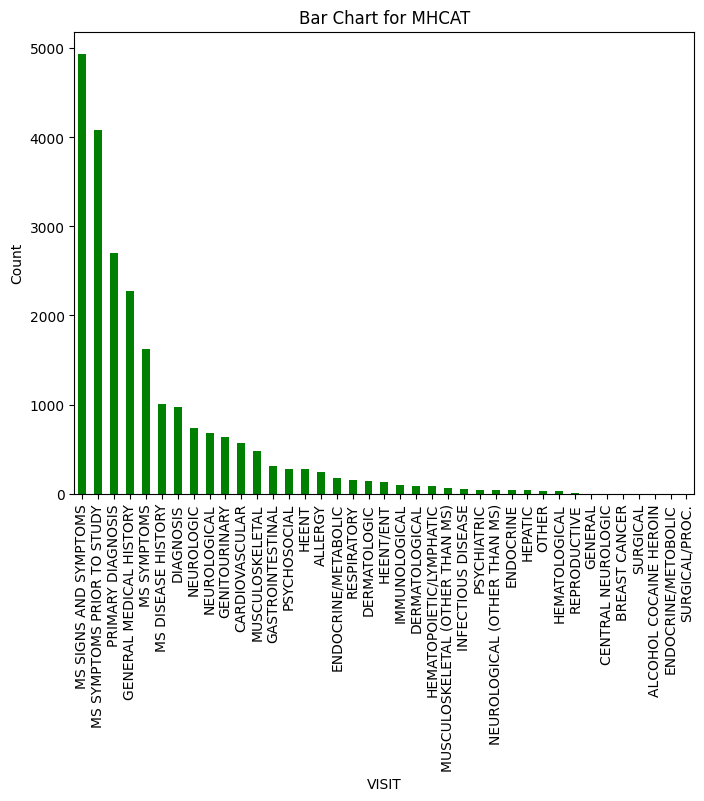

In [208]:
mhcat = medical_history['MHCAT'].dropna()

plt.figure(figsize=(8, 6))
mhcat.value_counts().plot(kind='bar', color='green')
plt.xlabel('VISIT')
plt.ylabel('Count')
plt.title('Bar Chart for MHCAT')
plt.show()

In [209]:
medical_history['SMHCAT'] = medical_history['MHCAT'].replace('MS SYMPTOMS', 'MS SIGNS AND SYMPTOMS')
medical_history['SMHCAT'] = medical_history['SMHCAT'].replace('NEUROLOGIC', 'NEUROLOGICAL')
medical_history['SMHCAT'] = medical_history['SMHCAT'].replace('DERMATOLOGIC', 'DERMATOLOGICAL')
#medical_history['SMHCAT'] = medical_history['SMHCAT'].replace('PRIMARY DIAGNOSIS', 'DIAGNOSIS')
medical_history['SMHCAT'] = medical_history['SMHCAT'].replace('HEENT', 'HEENT/ENT')
medical_history['SMHCAT'] = medical_history['SMHCAT'].replace({'REPRODUCTIVE','GENERAL','CENTRAL NEUROLOGIC','BREAST CANCER','SURGICAL','ALCOHOL COCAINE HEROIN','ENDOCRINE/METOBOLIC','SURGICAL/PROC.'}, 'OTHER')


smhcat_counts_medical_history = medical_history['SMHCAT'].value_counts().reset_index()
smhcat_counts_medical_history.columns = ['SMHCAT', 'Count']
total_count = smhcat_counts_medical_history['Count'].sum()
smhcat_counts_medical_history['Percentage'] = (smhcat_counts_medical_history['Count'] / total_count) * 100
print(smhcat_counts_medical_history) 

                             SMHCAT  Count  Percentage
0             MS SIGNS AND SYMPTOMS   6567   28.553415
1        MS SYMPTOMS PRIOR TO STUDY   4078   17.731206
2                 PRIMARY DIAGNOSIS   2704   11.757033
3           GENERAL MEDICAL HISTORY   2276    9.896082
4                      NEUROLOGICAL   1410    6.130701
5                MS DISEASE HISTORY   1008    4.382799
6                         DIAGNOSIS    977    4.248011
7                     GENITOURINARY    634    2.756642
8                    CARDIOVASCULAR    565    2.456629
9                   MUSCULOSKELETAL    482    2.095743
10                        HEENT/ENT    400    1.739206
11                 GASTROINTESTINAL    313    1.360929
12                     PSYCHOSOCIAL    274    1.191356
13                          ALLERGY    248    1.078308
14                   DERMATOLOGICAL    231    1.004391
15              ENDOCRINE/METABOLIC    179    0.778295
16                      RESPIRATORY    151    0.656550
17        

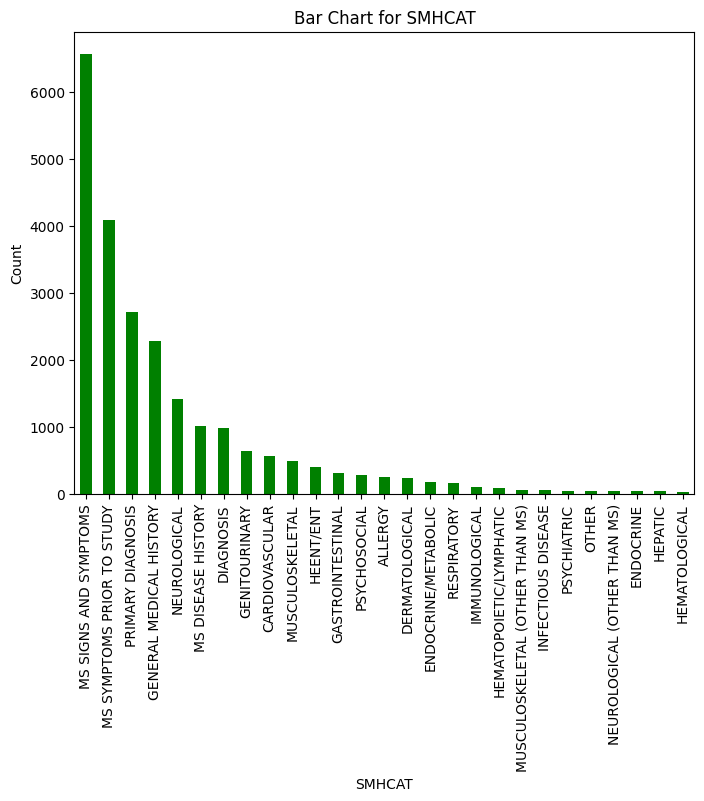

In [210]:
smhcat = medical_history['SMHCAT'].dropna()

plt.figure(figsize=(8, 6))
smhcat.value_counts().plot(kind='bar', color='green')
plt.xlabel('SMHCAT')
plt.ylabel('Count')
plt.title('Bar Chart for SMHCAT')
plt.show()

In [211]:
# MHSCAT - subcategory
mhscat_counts_medical_history = medical_history['MHSCAT'].value_counts().reset_index()
mhscat_counts_medical_history.columns = ['MHSCAT', 'Count']
total_count = mhscat_counts_medical_history['Count'].sum()
mhscat_counts_medical_history['Percentage'] = (mhscat_counts_medical_history['Count'] / total_count) * 100
print(mhscat_counts_medical_history) #stil quite some categories, but better

                             MHSCAT  Count  Percentage
0   PROTOCOL DEFINED CURRENT COURSE   2395   30.053959
1                MOTOR DISTURBANCES    822   10.314971
2     COORDINATION/BALANCE PROBLEMS    647    8.118961
3                             CNS/B    547    6.864098
4                               GEN    481    6.035889
5              SENSORY DISTURBANCES    363    4.555151
6                      ONSET COURSE    309    3.877525
7                             ONSET    305    3.827331
8                  CONFIRMED BY MRI    298    3.739491
9               BLADDER DYSFUNCTION    269    3.375580
10             COGNITIVE IMPAIRMENT    255    3.199900
11                  VISION PROBLEMS    251    3.149705
12                              MUS    225    2.823441
13                           UT/B/F    190    2.384239
14                              PNS    101    1.267411
15         OTHER SIGNS AND SYMPTOMS     90    1.129376
16                BOWEL DYSFUNCTION     69    0.865855
17        

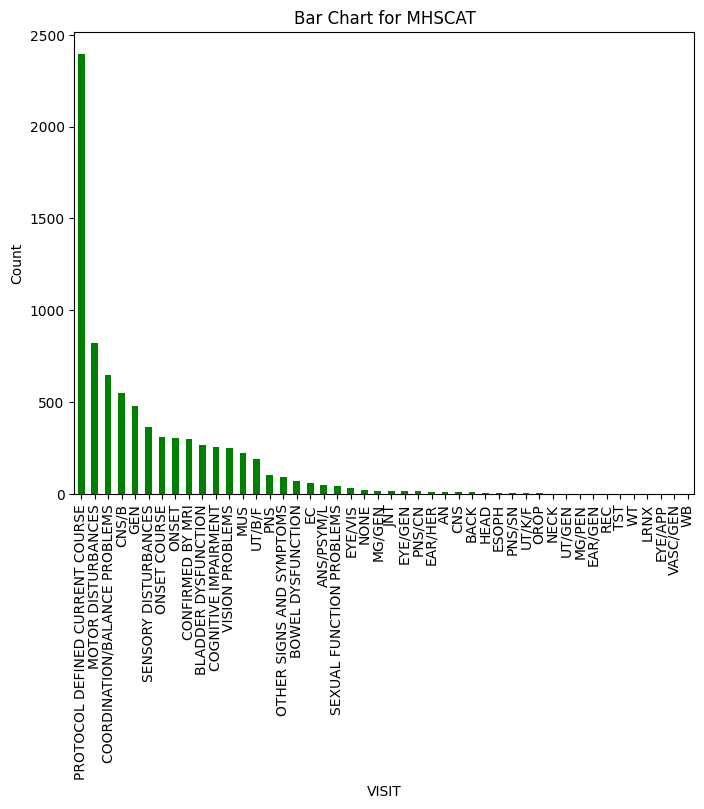

In [212]:
mhscat = medical_history['MHSCAT'].dropna()

plt.figure(figsize=(8, 6))
mhscat.value_counts().plot(kind='bar', color='green')
plt.xlabel('VISIT')
plt.ylabel('Count')
plt.title('Bar Chart for MHSCAT')
plt.show()

In [213]:
#MHPRESP
mhpresp_counts_medical_history = medical_history['MHPRESP'].value_counts().reset_index()
mhpresp_counts_medical_history.columns = ['MHPRESP', 'Count']
total_count = mhpresp_counts_medical_history['Count'].sum()
mhpresp_counts_medical_history['Percentage'] = (mhpresp_counts_medical_history['Count'] / total_count) * 100
print(mhpresp_counts_medical_history) #is this useful?

  MHPRESP  Count  Percentage
0       Y   6043       100.0


In [214]:
#MHOCCUR
mhoccur_counts_medical_history = medical_history['MHOCCUR'].value_counts().reset_index()
mhoccur_counts_medical_history.columns = ['MHOCCUR', 'Count']
total_count = mhoccur_counts_medical_history['Count'].sum()
mhoccur_counts_medical_history['Percentage'] = (mhoccur_counts_medical_history['Count'] / total_count) * 100
print(mhoccur_counts_medical_history) 

  MHOCCUR  Count  Percentage
0       Y   5217   86.331292
1       N    826   13.668708


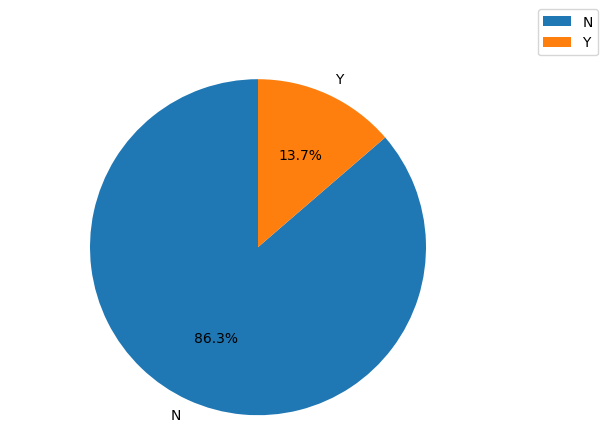

In [215]:
# Pie chart - dropped NA for now
categories = medical_history['MHOCCUR'].dropna().unique()
category_counts = medical_history['MHOCCUR'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [216]:
#MHBODSYS
mhbodsys_counts_medical_history = medical_history['MHBODSYS'].value_counts().reset_index()
mhbodsys_counts_medical_history.columns = ['MHBODSYS', 'Count']
total_count = mhbodsys_counts_medical_history['Count'].sum()
mhbodsys_counts_medical_history['Percentage'] = (mhbodsys_counts_medical_history['Count'] / total_count) * 100
print(mhbodsys_counts_medical_history)

                                             MHBODSYS  Count  Percentage
0                           NEUROLOGICAL (MS RELATED)   2758   24.363958
1                            NERVOUS SYSTEM DISORDERS   1540   13.604240
2                                             NERVOUS   1021    9.019435
3                                     MUSCULOSKELETAL    861    7.606007
4   GENERAL DISORDERS AND ADMINISTRATION SITE COND...    790    6.978799
5                                    GASTROINTESTINAL    307    2.712014
6                                       GENITOURINARY    297    2.623675
7                         RENAL AND URINARY DISORDERS    269    2.376325
8                                      CARDIOVASCULAR    253    2.234982
9                                                EENT    249    2.199647
10                                         UROGENITAL    228    2.014134
11                                        PSYCHIATRIC    208    1.837456
12                                            SURGE

Note: MHDECOD write extensivelly the name of some terms in MHTERM (seems an irrelevant variable, might drop later) - but at the same time it groups other categories in MHTERM which can help
- should i use MHDECOD when it exists, and complement with MHTERM in the missing values?

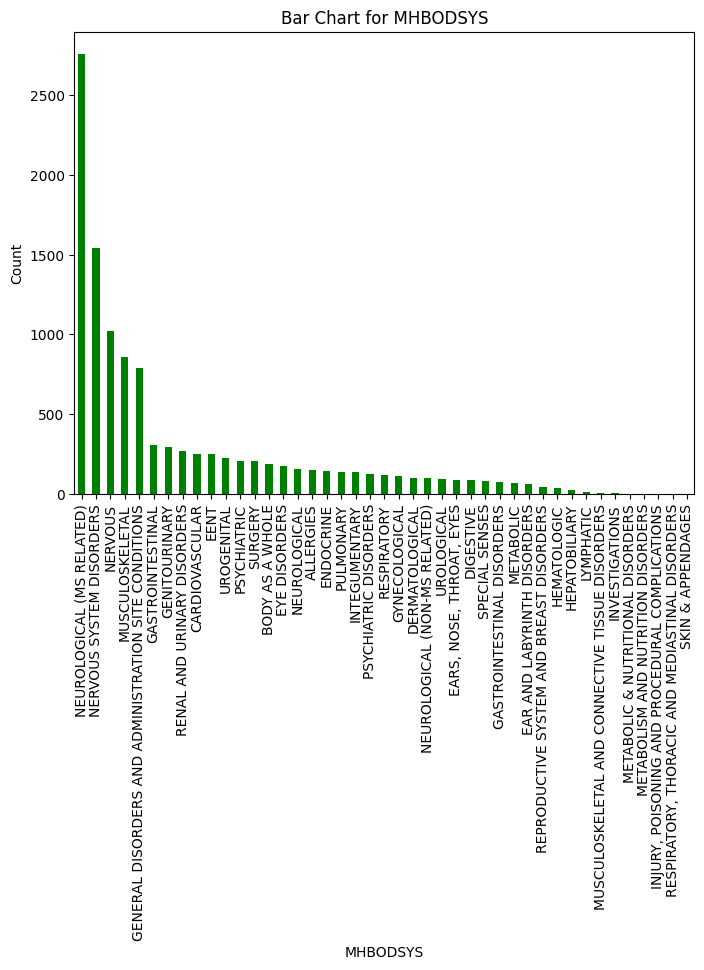

In [217]:
mhbodsys = medical_history['MHBODSYS'].dropna()

plt.figure(figsize=(8, 6))
mhbodsys.value_counts().plot(kind='bar', color='green')
plt.xlabel('MHBODSYS')
plt.ylabel('Count')
plt.title('Bar Chart for MHBODSYS')
plt.show()

In [218]:
#MHSOC
mhsoc_counts_medical_history = medical_history['MHSOC'].value_counts().reset_index()
mhsoc_counts_medical_history.columns = ['MHSOC', 'Count']
total_count = mhsoc_counts_medical_history['Count'].sum()
mhsoc_counts_medical_history['Percentage'] = (mhsoc_counts_medical_history['Count'] / total_count) * 100
print(mhsoc_counts_medical_history)

                                                MHSOC  Count  Percentage
0                            NERVOUS SYSTEM DISORDERS   1762   42.355769
1     MUSCULOSKELETAL AND CONNECTIVE TISSUE DISORDERS    381    9.158654
2                         RENAL AND URINARY DISORDERS    341    8.197115
3                     SURGICAL AND MEDICAL PROCEDURES    254    6.105769
4   GENERAL DISORDERS AND ADMINISTRATION SITE COND...    252    6.057692
5                          GASTROINTESTINAL DISORDERS    175    4.206731
6                               PSYCHIATRIC DISORDERS    150    3.605769
7                                       EYE DISORDERS    125    3.004808
8            REPRODUCTIVE SYSTEM AND BREAST DISORDERS     91    2.187500
9      INJURY, POISONING AND PROCEDURAL COMPLICATIONS     87    2.091346
10                        INFECTIONS AND INFESTATIONS     85    2.043269
11             SKIN AND SUBCUTANEOUS TISSUE DISORDERS     73    1.754808
12                            IMMUNE SYSTEM DISORDE

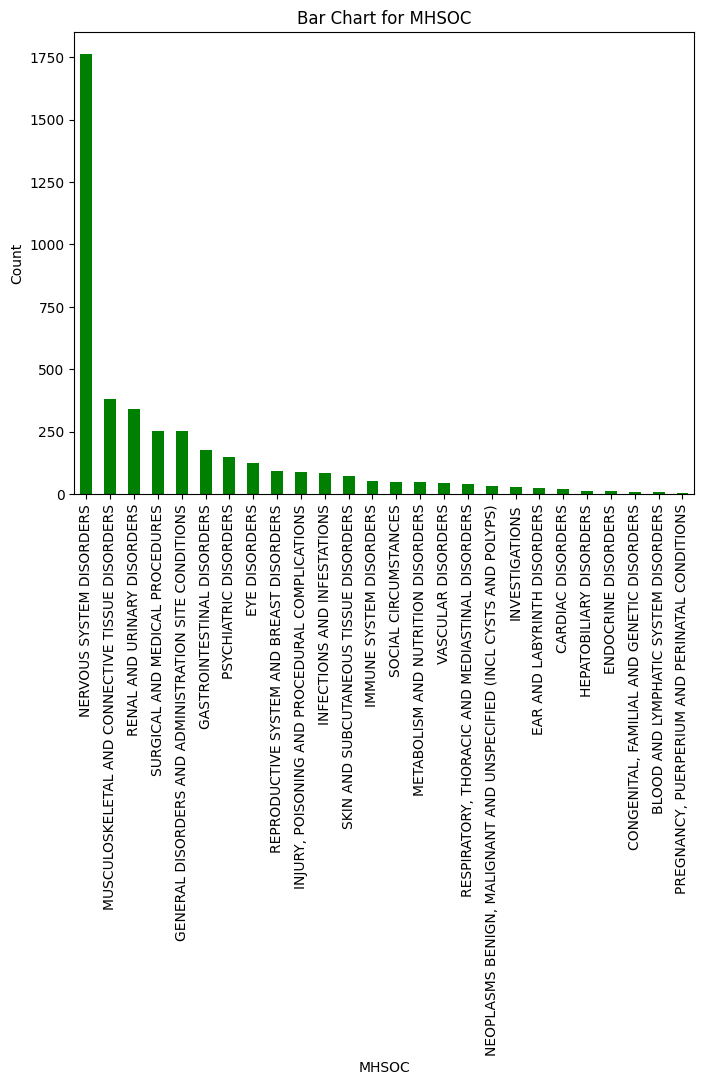

In [219]:
mhsoc = medical_history['MHSOC'].dropna()

plt.figure(figsize=(8, 6))
mhsoc.value_counts().plot(kind='bar', color='green')
plt.xlabel('MHSOC')
plt.ylabel('Count')
plt.title('Bar Chart for MHSOC')
plt.show()

In [220]:
#MHSEV
mhsev_counts_medical_history = medical_history['MHSEV'].value_counts().reset_index()
mhsev_counts_medical_history.columns = ['MHSEV', 'Count']
total_count = mhsev_counts_medical_history['Count'].sum()
mhsev_counts_medical_history['Percentage'] = (mhsev_counts_medical_history['Count'] / total_count) * 100
print(mhsev_counts_medical_history)

      MHSEV  Count  Percentage
0      MILD   2323   48.977440
1  MODERATE   1938   40.860215
2    SEVERE    482   10.162345


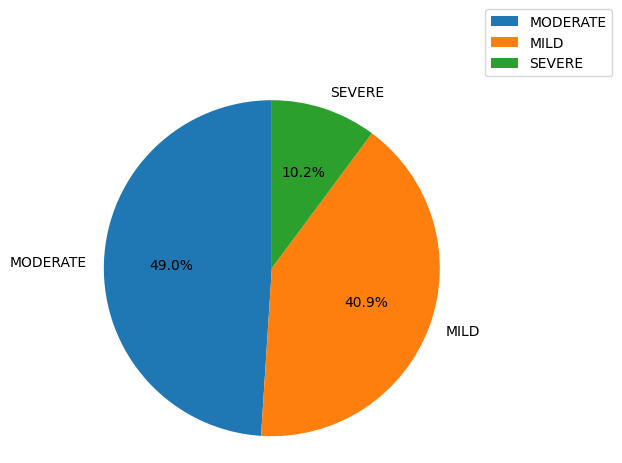

In [221]:
# Pie chart - dropped NA for now
categories = medical_history['MHSEV'].dropna().unique()
category_counts = medical_history['MHSEV'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [222]:
#MHCONTRT
mhcontrt_counts_medical_history = medical_history['MHCONTRT'].value_counts().reset_index()
mhcontrt_counts_medical_history.columns = ['MHCONTRT', 'Count']
total_count = mhcontrt_counts_medical_history['Count'].sum()
mhcontrt_counts_medical_history['Percentage'] = (mhcontrt_counts_medical_history['Count'] / total_count) * 100
print(mhcontrt_counts_medical_history)

  MHCONTRT  Count  Percentage
0        Y    796   58.919319
1        N    555   41.080681


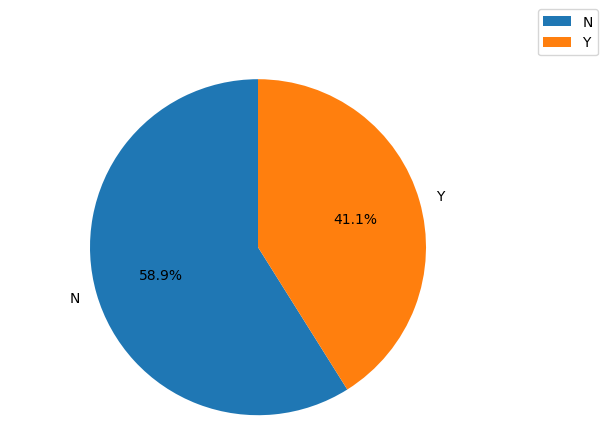

In [223]:
# Pie chart - dropped NA for now
categories = medical_history['MHCONTRT'].dropna().unique()
category_counts = medical_history['MHCONTRT'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show() 

In [224]:
visit_counts_medical_history = medical_history['VISIT'].value_counts().reset_index()
visit_counts_medical_history.columns = ['VISIT', 'Count']
total_count = visit_counts_medical_history['Count'].sum()
visit_counts_medical_history['Percentage'] = (visit_counts_medical_history['Count'] / total_count) * 100
print(visit_counts_medical_history)

          VISIT  Count  Percentage
0     SCREENING  13790    66.41942
1  SCREENING -3   6972    33.58058


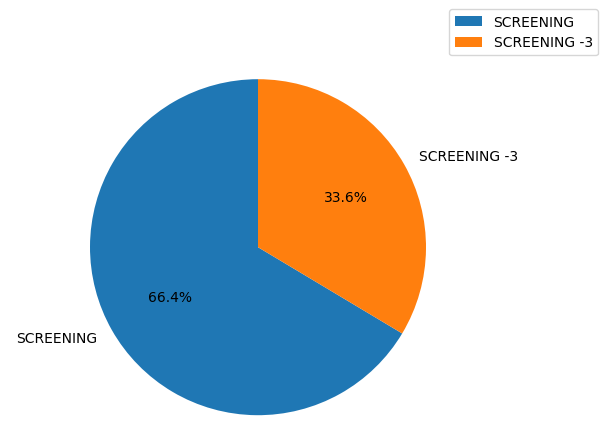

In [225]:
# Pie chart - dropped NA for now
categories = medical_history['VISIT'].dropna().unique()
category_counts = medical_history['VISIT'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [226]:
#MHENRF
mhenrf_counts_medical_history = medical_history['MHENRF'].value_counts().reset_index()
mhenrf_counts_medical_history.columns = ['MHENRF', 'Count']
total_count = mhenrf_counts_medical_history['Count'].sum()
mhenrf_counts_medical_history['Percentage'] = (mhenrf_counts_medical_history['Count'] / total_count) * 100
print(mhenrf_counts_medical_history)

         MHENRF  Count  Percentage
0  DURING/AFTER   3361   38.895961
1        BEFORE   2702   31.269529
2       ONGOING   2578   29.834510


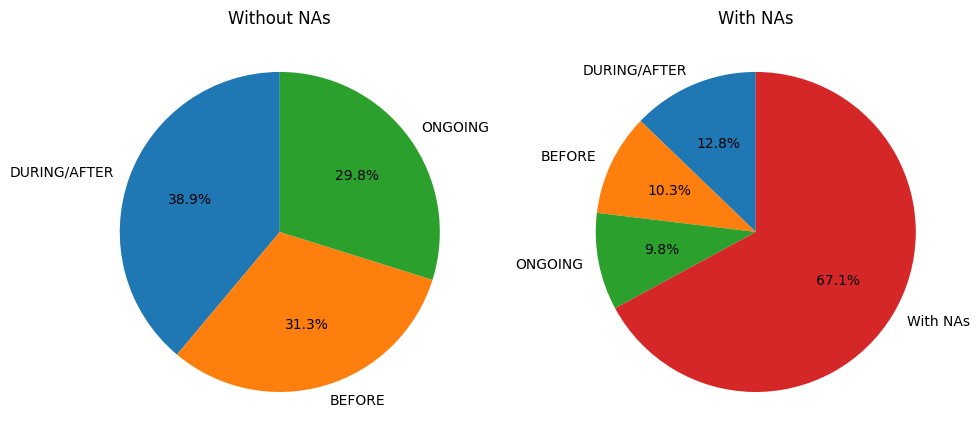

In [227]:
#import matplotlib.pyplot as plt

# Sample data
categories_without_na = medical_history['MHENRF'].dropna().unique()
category_counts_without_na = medical_history['MHENRF'].dropna().value_counts()

# Add a category for NaN
categories_with_na = list(categories_without_na) + ['With NAs']
category_counts_with_na = list(category_counts_without_na) + [medical_history['MHENRF'].isna().sum()]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pie chart without NAs
axes[0].pie(category_counts_without_na, labels=categories_without_na, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Without NAs')

# Plot the pie chart with the percentage of NAs
axes[1].pie(category_counts_with_na, labels=categories_with_na, autopct='%1.1f%%', startangle=90)
axes[1].set_title('With NAs')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [228]:
categories_with_na = medical_history['MHENRF'].unique()
category_counts_with_na = medical_history['MHENRF'].value_counts()
category_counts_with_na

MHENRF
DURING/AFTER    3361
BEFORE          2702
ONGOING         2578
Name: count, dtype: int64

- descriptive analysis for continuous variables

In [229]:
numeric_columns = ['VISITNUM', 'MHDY']

descriptive_numeric = {
    'Count': medical_history[numeric_columns].count(), #cases that are not missing
    'Missing Cases': medical_history[numeric_columns].isna().sum(),
    'Median': medical_history[numeric_columns].median(),
    'Standard Deviation': medical_history[numeric_columns].std()
}

num_medical_history = pd.DataFrame(descriptive_numeric)
print(num_medical_history)

          Count  Missing Cases  Median  Standard Deviation
VISITNUM  20762           5490     0.0            5.579848
MHDY      14100          12152   -28.0           15.228217


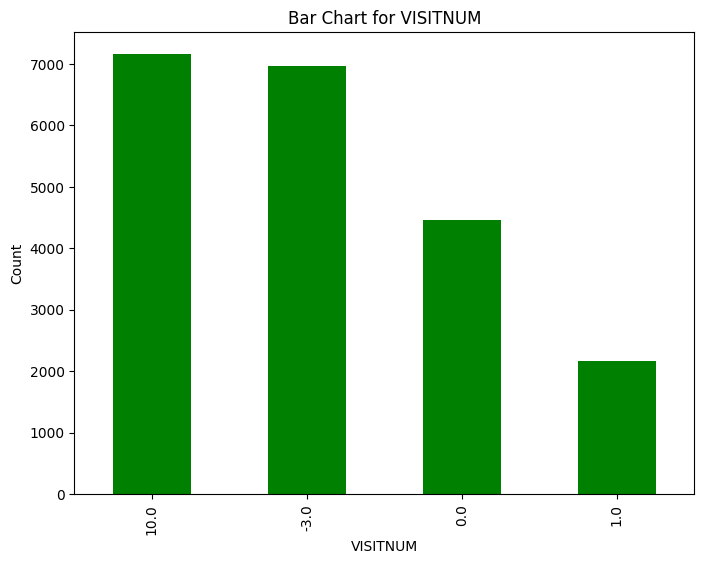

In [230]:
visitnum = medical_history['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
visitnum.value_counts().plot(kind='bar', color='green')
plt.xlabel('VISITNUM')
plt.ylabel('Count')
plt.title('Bar Chart for VISITNUM')
plt.show()

In [231]:
mhdy = medical_history['MHDY'].dropna()

summary_stats = mhdy.describe()
summary_stats


count    14100.000000
mean       -32.757730
std         15.228217
min       -140.000000
25%        -38.000000
50%        -28.000000
75%        -21.000000
max          1.000000
Name: MHDY, dtype: float64

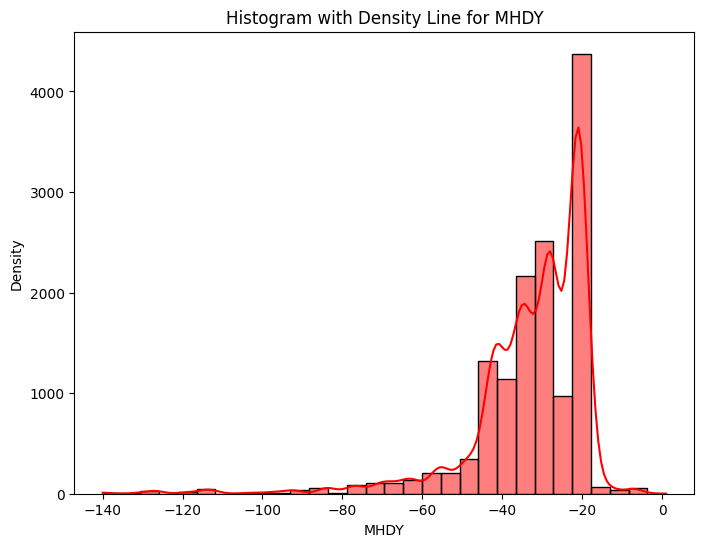

In [232]:
mhdy = medical_history['MHDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(mhdy, kde=True, color='red', bins=30)
plt.xlabel('MHDY')
plt.ylabel('Density')
plt.title('Histogram with Density Line for MHDY')
plt.show()


Notes:
- for MHCAT and MHSCAT, maybe group the small categories into one called "other"
    - are we gonna use both category and subcategory of medical history?

#### Data Transformation

In [233]:
#medical_history['MHNEWCAT'] = '0'

terms_to_check = ['ALLERGY', 'ALLERGIES']

# Compile a regular expression pattern for partial matches of terms
pattern = '|'.join(terms_to_check)

# Check each row for the presence of any term in any of the four columns
for index, row in medical_history.iterrows():
    found_term = False  # Flag to track if either term is found in any column
    for column in ['MHTERM', 'MHDECOD', 'MHCAT', 'MHBODSYS']:
        if pd.notna(row[column]) and pd.Series(row[column]).str.contains(pattern, case=False, regex=True).any():
            found_term = True
            break  # Break the loop when a match is found in any column

    # Set 'MHNEWCAT' to 'X' if either term is found, otherwise, set it to 'Y'
    medical_history.at[index, 'MHNEWCAT'] = 'ALLERGY' if found_term else pd.NA

medical_history

#filtered_df = medical_history.loc[medical_history['MHCAT'] == 'ALLERGY']
#filtered_df

C:\Users\anaso\AppData\Local\Temp\ipykernel_3708\1620514701.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ALLERGY' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  medical_history.at[index, 'MHNEWCAT'] = 'ALLERGY' if found_term else pd.NA


,USUBJID,MHSEQ,MHTERM,MHDECOD,MHCAT,MHSCAT,MHPRESP,MHOCCUR,MHBODSYS,MHSOC,MHSEV,MHCONTRT,VISITNUM,VISIT,MHDY,MHENRF,SMHCAT,MHNEWCAT
21041,MSOAC/0014,1,RRMS,Relapsing-remitting multiple sclerosis,PRIMARY DIAGNOSIS,PROTOCOL DEFINED CURRENT COURSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIMARY DIAGNOSIS,NaN
12262,MSOAC/0016,1,BOWEL URGENCY OR INCONTINENCE,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN,MS SIGNS AND SYMPTOMS,NaN
12296,MSOAC/0016,2,CEREBELLAR SYMPTOMS,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN,MS SIGNS AND SYMPTOMS,NaN
12302,MSOAC/0016,3,CONSTIPATION,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN,MS SIGNS AND SYMPTOMS,NaN
12323,MSOAC/0016,4,DECREASED MENTATION,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN,MS SIGNS AND SYMPTOMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15955,MSOAC/9998,36,URINARY URGENCY,NaN,MS SYMPTOMS PRIOR TO STUDY,NaN,NaN,NaN,NaN,NaN,MILD,NaN,-3.0,SCREENING -3,-28.0,NaN,MS SYMPTOMS PRIOR TO STUDY,NaN
15372,MSOAC/9998,37,VERTIGO,NaN,MS SYMPTOMS PRIOR TO STUDY,NaN,NaN,NaN,NaN,NaN,MILD,NaN,-3.0,SCREENING -3,-28.0,NaN,MS SYMPTOMS PRIOR TO STUDY,NaN
20393,MSOAC/9998,38,MS DIAGNOSIS,Multiple sclerosis,PRIMARY DIAGNOSIS,ONSET COURSE,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,SCREENING -3,-28.0,NaN,PRIMARY DIAGNOSIS,NaN
20438,MSOAC/9998,39,PPMS,Primary progressive multiple sclerosis,PRIMARY DIAGNOSIS,PROTOCOL DEFINED CURRENT COURSE,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,SCREENING -3,-28.0,NaN,PRIMARY DIAGNOSIS,NaN


In [234]:
#medical_history['MHNEWCAT'] = '0'

terms_to_check = ['BLADDER', 'URINARY','URINATION']#'GENITOURINARY',

# Compile a regular expression pattern for partial matches of terms
pattern = '|'.join(terms_to_check)

# Check each row for the presence of any term in any of the four columns
for index, row in medical_history.iterrows():
    found_term = False  # Flag to track if either term is found in any column
    for column in ['MHTERM', 'MHDECOD', 'MHCAT', 'MHBODSYS']:
        if pd.notna(row[column]) and pd.Series(row[column]).str.contains(pattern, case=False, regex=True).any():
            found_term = True
            break  # Break the loop when a match is found in any column

    # Set 'MHNEWCAT' to 'X' if either term is found, otherwise, set it to 'Y'
    if pd.isna(row['MHNEWCAT']):
        medical_history.at[index, 'MHNEWCAT'] = 'URINARY' if found_term else pd.NA

medical_history

,USUBJID,MHSEQ,MHTERM,MHDECOD,MHCAT,MHSCAT,MHPRESP,MHOCCUR,MHBODSYS,MHSOC,MHSEV,MHCONTRT,VISITNUM,VISIT,MHDY,MHENRF,SMHCAT,MHNEWCAT
21041,MSOAC/0014,1,RRMS,Relapsing-remitting multiple sclerosis,PRIMARY DIAGNOSIS,PROTOCOL DEFINED CURRENT COURSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIMARY DIAGNOSIS,NaN
12262,MSOAC/0016,1,BOWEL URGENCY OR INCONTINENCE,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN,MS SIGNS AND SYMPTOMS,NaN
12296,MSOAC/0016,2,CEREBELLAR SYMPTOMS,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN,MS SIGNS AND SYMPTOMS,NaN
12302,MSOAC/0016,3,CONSTIPATION,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN,MS SIGNS AND SYMPTOMS,NaN
12323,MSOAC/0016,4,DECREASED MENTATION,NaN,MS SYMPTOMS,NaN,Y,N,NaN,NaN,NaN,NaN,1.0,SCREENING,-21.0,NaN,MS SIGNS AND SYMPTOMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15955,MSOAC/9998,36,URINARY URGENCY,NaN,MS SYMPTOMS PRIOR TO STUDY,NaN,NaN,NaN,NaN,NaN,MILD,NaN,-3.0,SCREENING -3,-28.0,NaN,MS SYMPTOMS PRIOR TO STUDY,URINARY
15372,MSOAC/9998,37,VERTIGO,NaN,MS SYMPTOMS PRIOR TO STUDY,NaN,NaN,NaN,NaN,NaN,MILD,NaN,-3.0,SCREENING -3,-28.0,NaN,MS SYMPTOMS PRIOR TO STUDY,<NA>
20393,MSOAC/9998,38,MS DIAGNOSIS,Multiple sclerosis,PRIMARY DIAGNOSIS,ONSET COURSE,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,SCREENING -3,-28.0,NaN,PRIMARY DIAGNOSIS,<NA>
20438,MSOAC/9998,39,PPMS,Primary progressive multiple sclerosis,PRIMARY DIAGNOSIS,PROTOCOL DEFINED CURRENT COURSE,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,SCREENING -3,-28.0,NaN,PRIMARY DIAGNOSIS,<NA>


In [235]:
# new columns to drop
columns_to_drop_2 = ['VISIT','VISITNUM', 'MHENRF','MHDECOD', 'MHSCAT','MHSEQ','MHCAT','MHBODSYS','MHSOC'] 
#visit, visitnum, mhseq irrelevant
#mhdy, mhenrf not relevant for a static dataset -- double check mhenrf
#mhdecod with many missing - might not help
#MHSCAT might be unnecessary - also quite some missing
#MHCAT for now because i have the more organized version SMHCAT
medical_history.drop(columns=columns_to_drop_2, inplace=True)
medical_history

,USUBJID,MHTERM,MHPRESP,MHOCCUR,MHSEV,MHCONTRT,MHDY,SMHCAT,MHNEWCAT
21041,MSOAC/0014,RRMS,NaN,NaN,NaN,NaN,NaN,PRIMARY DIAGNOSIS,NaN
12262,MSOAC/0016,BOWEL URGENCY OR INCONTINENCE,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN
12296,MSOAC/0016,CEREBELLAR SYMPTOMS,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN
12302,MSOAC/0016,CONSTIPATION,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN
12323,MSOAC/0016,DECREASED MENTATION,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN
...,...,...,...,...,...,...,...,...,...
15955,MSOAC/9998,URINARY URGENCY,NaN,NaN,MILD,NaN,-28.0,MS SYMPTOMS PRIOR TO STUDY,URINARY
15372,MSOAC/9998,VERTIGO,NaN,NaN,MILD,NaN,-28.0,MS SYMPTOMS PRIOR TO STUDY,<NA>
20393,MSOAC/9998,MS DIAGNOSIS,NaN,NaN,NaN,NaN,-28.0,PRIMARY DIAGNOSIS,<NA>
20438,MSOAC/9998,PPMS,NaN,NaN,NaN,NaN,-28.0,PRIMARY DIAGNOSIS,<NA>


In [236]:
filtered_medical_history = medical_history[medical_history['SMHCAT'] == 'DIAGNOSIS']
filtered_medical_history

,USUBJID,MHTERM,MHPRESP,MHOCCUR,MHSEV,MHCONTRT,MHDY,SMHCAT,MHNEWCAT
1544,MSOAC/0016,SECONDARY-PROGRESSIVE,NaN,NaN,NaN,NaN,-21.0,DIAGNOSIS,NaN
1096,MSOAC/0041,SUSPECTED ONSET OF MS,NaN,NaN,NaN,NaN,-43.0,DIAGNOSIS,NaN
1424,MSOAC/0041,MS DIAGNOSIS CONFIRMED BY MRI,NaN,NaN,NaN,NaN,-43.0,DIAGNOSIS,NaN
1441,MSOAC/0041,SPMS DIAGNOSIS,NaN,NaN,NaN,NaN,-43.0,DIAGNOSIS,NaN
1456,MSOAC/0053,SUSPECTED ONSET OF MS,NaN,NaN,NaN,NaN,-43.0,DIAGNOSIS,NaN
...,...,...,...,...,...,...,...,...,...
1319,MSOAC/9968,MS DIAGNOSIS CONFIRMED BY MRI,NaN,NaN,NaN,NaN,-48.0,DIAGNOSIS,NaN
1324,MSOAC/9968,SPMS DIAGNOSIS,NaN,NaN,NaN,NaN,-48.0,DIAGNOSIS,NaN
1937,MSOAC/9981,SUSPECTED ONSET OF MS,NaN,NaN,NaN,NaN,-28.0,DIAGNOSIS,NaN
1879,MSOAC/9981,MS DIAGNOSIS CONFIRMED BY MRI,NaN,NaN,NaN,NaN,-28.0,DIAGNOSIS,NaN


In [237]:
mhterm2_counts_medical_history = filtered_medical_history['MHTERM'].value_counts().reset_index()
mhterm2_counts_medical_history.columns = ['MHTERM', 'Count']
total_count = mhterm2_counts_medical_history['Count'].sum()
mhterm2_counts_medical_history['Percentage'] = (mhterm2_counts_medical_history['Count'] / total_count) * 100
print(mhterm2_counts_medical_history)

                          MHTERM  Count  Percentage
0          SUSPECTED ONSET OF MS    305   31.218014
1                 SPMS DIAGNOSIS    304   31.115660
2  MS DIAGNOSIS CONFIRMED BY MRI    298   30.501535
3          SECONDARY-PROGRESSIVE     31    3.172979
4            PRIMARY-PROGRESSIVE     21    2.149437
5            RELAPSING-REMITTING     16    1.637666
6          PROGRESSIVE RELAPSING      2    0.204708


In [238]:
medical_history = medical_history[medical_history['MHTERM'] != 'SUSPECTED ONSET OF MS']
medical_history = medical_history[medical_history['MHTERM'] != 'MS DIAGNOSIS CONFIRMED BY MRI']
medical_history = medical_history[medical_history['MHTERM'] != 'PROGRESSIVE RELAPSING']

In [239]:
filtered2_medical_history = medical_history[medical_history['SMHCAT'] == 'PRIMARY DIAGNOSIS']
filtered2_medical_history

,USUBJID,MHTERM,MHPRESP,MHOCCUR,MHSEV,MHCONTRT,MHDY,SMHCAT,MHNEWCAT
21041,MSOAC/0014,RRMS,NaN,NaN,NaN,NaN,NaN,PRIMARY DIAGNOSIS,NaN
20460,MSOAC/0019,MS DIAGNOSIS,NaN,NaN,NaN,NaN,-27.0,PRIMARY DIAGNOSIS,NaN
20466,MSOAC/0019,PPMS,NaN,NaN,NaN,NaN,-27.0,PRIMARY DIAGNOSIS,NaN
22314,MSOAC/0024,SPMS,NaN,NaN,NaN,NaN,NaN,PRIMARY DIAGNOSIS,NaN
21042,MSOAC/0030,RRMS,NaN,NaN,NaN,NaN,NaN,PRIMARY DIAGNOSIS,NaN
...,...,...,...,...,...,...,...,...,...
22311,MSOAC/9987,RRMS,NaN,NaN,NaN,NaN,NaN,PRIMARY DIAGNOSIS,NaN
22312,MSOAC/9995,RRMS,NaN,NaN,NaN,NaN,NaN,PRIMARY DIAGNOSIS,NaN
20393,MSOAC/9998,MS DIAGNOSIS,NaN,NaN,NaN,NaN,-28.0,PRIMARY DIAGNOSIS,NaN
20438,MSOAC/9998,PPMS,NaN,NaN,NaN,NaN,-28.0,PRIMARY DIAGNOSIS,NaN


In [240]:
mhterm3_counts_medical_history = filtered2_medical_history['MHTERM'].value_counts().reset_index()
mhterm3_counts_medical_history.columns = ['MHTERM', 'Count']
total_count = mhterm3_counts_medical_history['Count'].sum()
mhterm3_counts_medical_history['Percentage'] = (mhterm2_counts_medical_history['Count'] / total_count) * 100
print(mhterm3_counts_medical_history)

         MHTERM  Count  Percentage
0          RRMS   1564   11.279586
1          SPMS    522   11.242604
2  MS DIAGNOSIS    309   11.020710
3          PPMS    309    1.146450


In [241]:
medical_history = medical_history[medical_history['MHTERM'] != 'MS DIAGNOSIS']

In [242]:
medical_history['MHDIAGN'] = medical_history.loc[medical_history['SMHCAT'].isin(['DIAGNOSIS', 'PRIMARY DIAGNOSIS']), 'MHTERM']
# Remove rows where 'MHDIAG' is 'MS DIAGNOSIS'
#medical_history = medical_history[medical_history['MHDIAGN'] != 'MS DIAGNOSIS']
medical_history


,USUBJID,MHTERM,MHPRESP,MHOCCUR,MHSEV,MHCONTRT,MHDY,SMHCAT,MHNEWCAT,MHDIAGN
21041,MSOAC/0014,RRMS,NaN,NaN,NaN,NaN,NaN,PRIMARY DIAGNOSIS,NaN,RRMS
12262,MSOAC/0016,BOWEL URGENCY OR INCONTINENCE,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN,NaN
12296,MSOAC/0016,CEREBELLAR SYMPTOMS,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN,NaN
12302,MSOAC/0016,CONSTIPATION,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN,NaN
12323,MSOAC/0016,DECREASED MENTATION,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15941,MSOAC/9998,URINARY RETENTION,NaN,NaN,MILD,NaN,-28.0,MS SYMPTOMS PRIOR TO STUDY,URINARY,NaN
15955,MSOAC/9998,URINARY URGENCY,NaN,NaN,MILD,NaN,-28.0,MS SYMPTOMS PRIOR TO STUDY,URINARY,NaN
15372,MSOAC/9998,VERTIGO,NaN,NaN,MILD,NaN,-28.0,MS SYMPTOMS PRIOR TO STUDY,<NA>,NaN
20438,MSOAC/9998,PPMS,NaN,NaN,NaN,NaN,-28.0,PRIMARY DIAGNOSIS,<NA>,PPMS


In [243]:
#MMHDIAGNHSOC
mhdiagn_counts_medical_history = medical_history['MHDIAGN'].value_counts().reset_index()
mhdiagn_counts_medical_history.columns = ['MHDIAGN', 'Count']
total_count = mhdiagn_counts_medical_history['Count'].sum()
mhdiagn_counts_medical_history['Percentage'] = (mhdiagn_counts_medical_history['Count'] / total_count) * 100
print(mhdiagn_counts_medical_history)

                 MHDIAGN  Count  Percentage
0                   RRMS   1564   56.523310
1                   SPMS    522   18.865197
2                   PPMS    309   11.167329
3         SPMS DIAGNOSIS    304   10.986628
4  SECONDARY-PROGRESSIVE     31    1.120347
5    PRIMARY-PROGRESSIVE     21    0.758945
6    RELAPSING-REMITTING     16    0.578244


In [244]:
medical_history['MHDIAGN'] = medical_history['MHDIAGN'].replace('RELAPSING-REMITTING', 'RRMS')
medical_history['MHDIAGN'] = medical_history['MHDIAGN'].replace('PRIMARY-PROGRESSIVE', 'PPMS')
medical_history['MHDIAGN'] = medical_history['MHDIAGN'].replace({'SPMS DIAGNOSIS','SECONDARY-PROGRESSIVE'}, 'SPMS')
medical_history['MHDIAGN'] = medical_history['MHDIAGN'].replace('MS DIAGNOSIS CONFIRMED BY MRI', 'MS DIAGNOSIS')

mhdiagn_counts_medical_history = medical_history['MHDIAGN'].value_counts().reset_index()
mhdiagn_counts_medical_history.columns = ['MHDIAGN', 'Count']
total_count = mhdiagn_counts_medical_history['Count'].sum()
mhdiagn_counts_medical_history['Percentage'] = (mhdiagn_counts_medical_history['Count'] / total_count) * 100
print(mhdiagn_counts_medical_history)

  MHDIAGN  Count  Percentage
0    RRMS   1580   57.101554
1    SPMS    857   30.972172
2    PPMS    330   11.926274


In [245]:
medical_history.loc[medical_history['MHDIAGN'].isin(['RRMS', 'SPMS', 'PPMS']), 'DIAGNTIME'] = medical_history['MHDY']
medical_history

,USUBJID,MHTERM,MHPRESP,MHOCCUR,MHSEV,MHCONTRT,MHDY,SMHCAT,MHNEWCAT,MHDIAGN,DIAGNTIME
21041,MSOAC/0014,RRMS,NaN,NaN,NaN,NaN,NaN,PRIMARY DIAGNOSIS,NaN,RRMS,NaN
12262,MSOAC/0016,BOWEL URGENCY OR INCONTINENCE,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN,NaN,NaN
12296,MSOAC/0016,CEREBELLAR SYMPTOMS,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN,NaN,NaN
12302,MSOAC/0016,CONSTIPATION,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN,NaN,NaN
12323,MSOAC/0016,DECREASED MENTATION,Y,N,NaN,NaN,-21.0,MS SIGNS AND SYMPTOMS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15941,MSOAC/9998,URINARY RETENTION,NaN,NaN,MILD,NaN,-28.0,MS SYMPTOMS PRIOR TO STUDY,URINARY,NaN,NaN
15955,MSOAC/9998,URINARY URGENCY,NaN,NaN,MILD,NaN,-28.0,MS SYMPTOMS PRIOR TO STUDY,URINARY,NaN,NaN
15372,MSOAC/9998,VERTIGO,NaN,NaN,MILD,NaN,-28.0,MS SYMPTOMS PRIOR TO STUDY,<NA>,NaN,NaN
20438,MSOAC/9998,PPMS,NaN,NaN,NaN,NaN,-28.0,PRIMARY DIAGNOSIS,<NA>,PPMS,-28.0


remove PROGRESSIVE RELAPSING?

In [246]:
def aggregate_and_remove_duplicates(series):
    unique_values = set(series.dropna())  # Drop NaN and convert to set
    return '; '.join(map(str, unique_values))

medical_history_aggregated = medical_history.groupby('USUBJID').agg(aggregate_and_remove_duplicates).reset_index()
#medical_history_aggregated = medical_history.groupby('USUBJID').agg(lambda x: ', '.join(map(str, x))).reset_index()
medical_history_aggregated.replace('', np.nan, inplace=True)

medical_history_aggregated['SMHCAT'] = medical_history_aggregated['SMHCAT'].replace('PRIMARY DIAGNOSIS', 'DIAGNOSIS')
medical_history_aggregated.drop(columns=['MHTERM','SMHCAT','MHDY'], inplace=True)

# Display the aggregated DataFrame
medical_history_aggregated

,USUBJID,MHPRESP,MHOCCUR,MHSEV,MHCONTRT,MHNEWCAT,MHDIAGN,DIAGNTIME
0,MSOAC/0014,NaN,NaN,NaN,NaN,NaN,RRMS,NaN
1,MSOAC/0016,Y,N; Y,MILD; MODERATE,N; Y,URINARY,SPMS,-21.0
2,MSOAC/0019,NaN,NaN,MILD; MODERATE,NaN,URINARY,PPMS,-27.0
3,MSOAC/0024,Y,Y,NaN,NaN,ALLERGY; URINARY,SPMS,NaN
4,MSOAC/0030,Y,Y,NaN,NaN,URINARY,RRMS,NaN
...,...,...,...,...,...,...,...,...
2460,MSOAC/9986,Y,Y,NaN,NaN,URINARY,RRMS,NaN
2461,MSOAC/9987,NaN,NaN,NaN,NaN,NaN,RRMS,NaN
2462,MSOAC/9995,NaN,NaN,NaN,NaN,NaN,RRMS,NaN
2463,MSOAC/9998,NaN,NaN,MILD; MODERATE,Y,ALLERGY; URINARY,PPMS,-28.0


In [250]:
# Function to check if 'ALLERGY' is present
def has_allergy(text):
    return 1 if pd.notna(text) and 'ALLERGY' in text else 0

def has_urinary(text):
    return 1 if pd.notna(text) and 'URINARY' in text else 0

# Apply the function to create a new column 'ALLERGY'
medical_history_aggregated['ALLERGY'] = medical_history_aggregated['MHNEWCAT'].apply(has_allergy)
medical_history_aggregated['URINARY'] = medical_history_aggregated['MHNEWCAT'].apply(has_urinary)

medical_history_aggregated.drop(columns=['MHNEWCAT'], inplace=True)


medical_history_aggregated

,USUBJID,MHPRESP,MHOCCUR,MHSEV,MHCONTRT,MHDIAGN,DIAGNTIME,ALLERGY,URINARY
0,MSOAC/0014,NaN,NaN,NaN,NaN,RRMS,NaN,0,0
1,MSOAC/0016,Y,N; Y,MILD; MODERATE,N; Y,SPMS,-21.0,0,1
2,MSOAC/0019,NaN,NaN,MILD; MODERATE,NaN,PPMS,-27.0,0,1
3,MSOAC/0024,Y,Y,NaN,NaN,SPMS,NaN,1,1
4,MSOAC/0030,Y,Y,NaN,NaN,RRMS,NaN,0,1
...,...,...,...,...,...,...,...,...,...
2460,MSOAC/9986,Y,Y,NaN,NaN,RRMS,NaN,0,1
2461,MSOAC/9987,NaN,NaN,NaN,NaN,RRMS,NaN,0,0
2462,MSOAC/9995,NaN,NaN,NaN,NaN,RRMS,NaN,0,0
2463,MSOAC/9998,NaN,NaN,MILD; MODERATE,Y,PPMS,-28.0,1,1


**Drop list of categories!! -- RF can´t split on these lists -- Choose like 3 interesting classes and do binary variable**

In [248]:
missing_percentage_mhagg = (medical_history_aggregated.isnull().sum() / len(medical_history_aggregated)) * 100
missing_medical_history_aggregated = pd.DataFrame({'Column Name': missing_percentage_mhagg.index, 'Missing Percentage': missing_percentage_mhagg.values})
#missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
missing_medical_history_aggregated = missing_medical_history_aggregated.sort_values(by='Missing Percentage', ascending=False)
print(missing_medical_history_aggregated)

  Column Name  Missing Percentage
4    MHCONTRT           88.235294
3       MHSEV           84.624746
7   DIAGNTIME           72.332657
1     MHPRESP           69.046653
2     MHOCCUR           69.046653
5    MHNEWCAT           52.900609
6     MHDIAGN            0.081136
0     USUBJID            0.000000
8     ALLERGY            0.000000
9     URINARY            0.000000


In [249]:
folder_name = 'new_data'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Specify the path for the CSV file
csv_file_path = os.path.join(folder_name, 'mh_agg.csv')

# Save the DataFrame to CSV
medical_history_aggregated.to_csv(csv_file_path, index=False)

Notes: 
- MHBODSYS (body sistem or organ class) might not be necessary if we have SMHCAT -- also MHBODSYS not cleaned yet